# **Laboratorio 12: 🚀 Despliegue 🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Martín Torrico
- Nombre de alumno 2: Alejandra Toro

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/MartinTorricoP/Laboratorios_MDS7202)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


In [ ]:
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run

## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_ids=[experiment_id])
    best_model_id = runs.sort_values("metrics.valid_f1", ascending=False)["run_id"].iloc[0]
    best_model = mlflow.xgboost.load_model(f"runs:/{best_model_id}/model")
    return best_model
```

In [45]:
import pandas as pd
# Cargamos el dataset y lo visualizamos
df = pd.read_csv("water_potability.csv")
df = df.dropna()
df = df[df['Potability']==0]
df.shape

(1200, 10)

In [17]:
# Verificamos valores nulos
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Para tratar los valores nulos, verificamos la correlación de ph, sulfate y trihalomethanes con Potability.

Matriz de correlación:


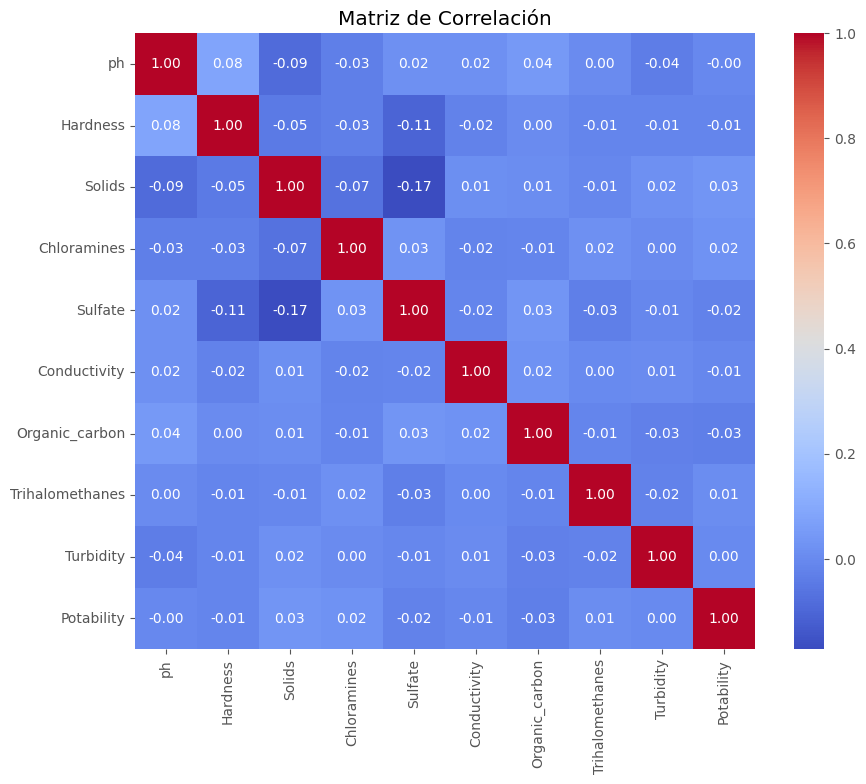

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")

# Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Notamos que no existe una correlación significativa con la variable objetivo, por lo que procedemos a eliminar las entradas con valores nulos antes de predecir la potabilidad del agua en base a sus características.

In [ ]:
# Contenido de optimize.py

import os
import pickle
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import optuna
from optuna.visualization.matplotlib import plot_optimization_history
import pandas as pd
import matplotlib.pyplot as plt
import mlflow
import mlflow.xgboost
import pkg_resources
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_ids=[experiment_id])
    best_model_id = runs.sort_values("metrics.valid_f1", ascending=False)["run_id"].iloc[0]
    best_model = mlflow.xgboost.load_model(f"runs:/{best_model_id}/model")
    return best_model

def get_best_model_global():
    # Buscar todas las ejecuciones en todos los experimentos
    runs = mlflow.search_runs()

    # Verificar si existe la métrica 'metrics.valid_f1'
    if "metrics.valid_f1" in runs.columns:
        # Filtrar ejecuciones con valores no nulos para 'valid_f1'
        valid_runs = runs[runs["metrics.valid_f1"].notnull()]

        if not valid_runs.empty:
            # Ordenar por 'valid_f1' de forma descendente y seleccionar la mejor
            best_run = valid_runs.loc[valid_runs["metrics.valid_f1"].idxmax()]
            best_model_id = best_run["run_id"]
            best_model = mlflow.xgboost.load_model(f"runs:/{best_model_id}/model")
            best_f1_score = best_run["metrics.valid_f1"]
            best_experiment_name = best_run["experiment_id"]

            print(f"Mejor modelo encontrado en el experimento ID: {best_experiment_name}")
            print(f"F1-Score: {best_f1_score}")
            
            return best_model, best_f1_score

def optimize_model(learning_rate_values):
    
    # Crear carpetas necesarias
    os.makedirs("plots", exist_ok=True)
    os.makedirs("models", exist_ok=True)

    # Cargar el dataset
    df = pd.read_csv("water_potability.csv")

    # Eliminamos las entradas con valores nulos
    df = df.dropna()

    # Dividir el dataset
    X = df.drop(columns=["Potability"])
    y = df["Potability"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

    for learning_rate in learning_rate_values:
        # Configurar experimento de MLflow para este learning_rate
        experiment_name = f"XGBoost_LR_{learning_rate}"
        mlflow.set_experiment(experiment_name)

        # Crear un estudio para optimización
        study = optuna.create_study(direction="maximize")

        def objective(trial):
            # Finalizar cualquier run activo
            if mlflow.active_run() is not None:
                mlflow.end_run()
            
            # Definir los hiperparámetros que Optuna optimizará
            param_grid = {
                'objective': 'binary:logistic',
                'eval_metric': 'auc',
                'learning_rate': learning_rate,  # Valor fijo para este experimento
                'max_depth': trial.suggest_int('max_depth', 2, 10),
                'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.1, 10),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
                'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            }

            # Crear el modelo con los hiperparámetros sugeridos
            model = xgb.XGBClassifier(**param_grid, random_state=123)
            
            # Entrenar el modelo
            model.fit(X_train, y_train)
            
            # Realizar predicciones
            y_pred = model.predict(X_test)
            
            # Calcular el F1-Score
            f1 = f1_score(y_test, y_pred)

            # Registrar en un nuevo run de MLflow
            with mlflow.start_run(run_name=f"XGBoost_Run_LR_{learning_rate:.2f}_Trial_{trial.number}"):
                mlflow.log_params(param_grid)
                mlflow.log_metric("valid_f1", f1)
                mlflow.xgboost.log_model(model, "model")
            
            return f1  # Optuna buscará maximizar este valor

        # Optimizar hiperparámetros para este learning_rate
        study.optimize(objective, n_trials=25)

        # Generar el gráfico de Optuna (Optimization History)
        fig1 = plot_optimization_history(study)

        # Ajustar el tamaño del gráfico
        fig1.figure.set_size_inches(12, 6)

        # Guardar el gráfico como archivo PNG
        fig1.figure.savefig(f"plots/optimization_history_lr_{learning_rate}_.png", bbox_inches="tight")

        # Registrar el archivo en MLflow
        mlflow.log_artifact(f"plots/optimization_history_lr_{learning_rate}_.png")




        # Devolver y guardar el mejor modelo para este experimento
        experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
        best_model = get_best_model(experiment_id)
        
        # Guardar el modelo con pickle
        with open(f"models/best_model_lr_{learning_rate}.pkl", "wb") as f:
            pickle.dump(best_model.get_booster(), f)

        # Guardar la importancia de las variables
        importance = best_model.get_booster().get_score(importance_type="weight")
        importance_df = pd.DataFrame(importance.items(), columns=["Feature", "Importance"])
        # Ajustar el tamaño del gráfico
        plt.figure(figsize=(12, 6))  # Aumentar el tamaño del gráfico

        # Crear el gráfico de barras
        importance_df.sort_values(by="Importance", ascending=False).plot(
            kind="bar",
            x="Feature",
            y="Importance",
            title=f"Feature Importance LR {learning_rate}",
            legend=True,
            figsize=(12, 6)  # Ajustar tamaño directamente aquí también
        )

        # Ajustar etiquetas del eje X
        plt.xticks(rotation=45, ha="right")

        # Añadir márgenes para evitar cortes
        plt.tight_layout()

        # Guardar el gráfico
        plt.savefig(f"plots/feature_importance_lr_{learning_rate}.png")
        mlflow.log_artifact(f"plots/feature_importance_lr_{learning_rate}.png")

    # Guardar las versiones de las librerías
    with open("models/requirements.txt", "w") as f:
        requirements = [f"{pkg.project_name}=={pkg.version}" for pkg in pkg_resources.working_set]
        f.write("\n".join(requirements))

if __name__ == "__main__":
    # Definir los valores fijos de learning_rate
    learning_rate_values = [0.1, 0.2, 0.3]
    
    # Ejecutar la optimización para cada learning_rate
    optimize_model(learning_rate_values)
    
    # Obtener y guardar el mejor modelo global
    best_model, best_f1_score = get_best_model_global()
    
    # Guardar el mejor modelo global con pickle
    with open("models/best_model_global.pkl", "wb") as f:
        pickle.dump(best_model.get_booster(), f)
    print("El mejor modelo global ha sido guardado en 'models/best_model.pkl'")
    
    # Verificar las columnas disponibles en el mejor run
    runs = mlflow.search_runs()
    print("Columnas disponibles en runs:")
    print(runs.columns)

    # Inspeccionar el mejor run
    best_run = runs.loc[runs["metrics.valid_f1"].idxmax()]
    print("Contenido del mejor run:")
    print(best_run)
    
    if best_model is not None:
        # Buscar el mejor run basado en valid_f1
        runs = mlflow.search_runs()
        best_run = runs.loc[runs["metrics.valid_f1"].idxmax()]

        # Recuperar los parámetros relevantes desde el mejor run
        relevant_params = {
            "learning_rate": best_run["params.learning_rate"],
            "max_depth": best_run["params.max_depth"],
            "min_child_weight": best_run["params.min_child_weight"],
            "subsample": best_run["params.subsample"],
            "colsample_bytree": best_run["params.colsample_bytree"],
            "lambda": best_run["params.lambda"],
            "alpha": best_run["params.alpha"],
            "n_estimators": best_run["params.n_estimators"],
        }

        # Convertir a DataFrame
        relevant_params_df = pd.DataFrame(
            list(relevant_params.items()), columns=["Parameter", "Value"]
        )

        # Asegurarse de que los valores sean numéricos
        relevant_params_df["Value"] = pd.to_numeric(relevant_params_df["Value"], errors="coerce")

        # Crear el gráfico con tamaño ajustado
        fig, ax = plt.subplots(figsize=(10, 6))  # Ajustar el tamaño del gráfico

        # Crear gráfico de barras
        bars = ax.bar(relevant_params_df["Parameter"], relevant_params_df["Value"], color="skyblue")

        # Añadir los valores encima de cada barra
        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                yval + 0.5,  # Desplazar un poco hacia arriba
                round(yval, 2),  # Mostrar valores con 2 decimales
                ha="center",
                va="bottom",
                fontsize=10
            )

        # Ajustar las etiquetas
        ax.set_title("Best Model Configurations", fontsize=16)
        ax.set_ylabel("Value", fontsize=12)
        ax.set_xlabel("Parameter", fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        
        
        plt.savefig("plots/best_model_configurations.png")
        mlflow.log_artifact("plots/best_model_configurations.png")
        print("Gráfico de configuraciones del mejor modelo guardado en '/plots/best_model_configurations.png'")
    else:
        print("No se encontró ningún modelo para graficar.")

# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta sección es generar una API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.
- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.
- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenen
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

In [ ]:
# Archivo main.py

from fastapi import FastAPI, HTTPException, Body
from pydantic import BaseModel
import pickle
import numpy as np
from xgboost import DMatrix

# Cargar el modelo entrenado
try:
    with open("models/best_model_global.pkl", "rb") as f:
        model = pickle.load(f)
except FileNotFoundError:
    raise Exception("El archivo 'best_model_global.pkl' no se encontró. Por favor, asegúrate de haber entrenado el modelo correctamente.")

# Crear una instancia de la aplicación FastAPI
app = FastAPI(
    title="API REST para Modelo de Potabilidad de Agua",
    description="API que utiliza un modelo XGBoost para predecir si una medición de agua es potable o no.",
    version="1.0.0",
)

# Definir un esquema para los datos de entrada usando Pydantic
class WaterQualityData(BaseModel):
    ph: float
    Hardness: float
    Solids: float
    Chloramines: float
    Sulfate: float
    Conductivity: float
    Organic_carbon: float
    Trihalomethanes: float
    Turbidity: float

# Ruta de bienvenida
@app.get("/")
def home():
    return {
        "message": "Bienvenido a la API para predicción de potabilidad de agua :)",
        "description": (
            "Este modelo utiliza datos de características químicas y físicas del agua "
            "para predecir si es potable (1) o no potable (0)."
        ),
        "input_example": {
            "ph": 10.316400384553162,
            "Hardness": 217.2668424334475,
            "Solids": 10676.508475429378,
            "Chloramines": 3.445514571005745,
            "Sulfate": 397.7549459751925,
            "Conductivity": 492.20647361771086,
            "Organic_carbon": 12.812732207582542,
            "Trihalomethanes": 72.28192021570328,
            "Turbidity": 3.4073494284238364,
        },
        "output_example": {"potabilidad": 0},
    }

# Ruta para predecir potabilidad
@app.post("/potabilidad/")
def predict_potability(
    data: WaterQualityData = Body(
        example={
            "ph": 10.316400384553162,
            "Hardness": 217.2668424334475,
            "Solids": 10676.508475429378,
            "Chloramines": 3.445514571005745,
            "Sulfate": 397.7549459751925,
            "Conductivity": 492.20647361771086,
            "Organic_carbon": 12.812732207582542,
            "Trihalomethanes": 72.28192021570328,
            "Turbidity": 3.4073494284238364,
        }
    )
):
    try:
        # Crear una matriz con los valores de entrada
        input_values = np.array([
            data.ph,
            data.Hardness,
            data.Solids,
            data.Chloramines,
            data.Sulfate,
            data.Conductivity,
            data.Organic_carbon,
            data.Trihalomethanes,
            data.Turbidity,
        ]).reshape(1, -1)

        # Nombres de las columnas esperadas por el modelo
        feature_names = [
            "ph",
            "Hardness",
            "Solids",
            "Chloramines",
            "Sulfate",
            "Conductivity",
            "Organic_carbon",
            "Trihalomethanes",
            "Turbidity"
        ]

        # Convertir a DMatrix con nombres de características
        dmatrix_input = DMatrix(input_values, feature_names=feature_names)

        # Realizar la predicción de probabilidad
        probability = model.predict(dmatrix_input)[0]

        # Decidir la clase basada en un umbral (aproximamos)
        prediction = 1 if probability >= 0.5 else 0

    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Error al procesar los datos de entrada: {str(e)}")

    return {"potabilidad": int(prediction)}


# Para ejecutar el servidor:
# Ejecuta este archivo con `python main.py` y accede a http://127.0.0.1:8000/docs para probar la API.
if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Para la dockerización, asegúrese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.

## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?
- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?
- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?
- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?
- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?

In [ ]:
# por ej, no añadir carpeta de plots
# docker compose ml

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<div align="center">
  <img src="https://i.pinimg.com/originals/84/5d/f1/845df1aefc6a5e37ae575327a0cc6e43.gif" width="500">
</div>